In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler


In [13]:
# Merge data and aggregate
features = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'ProductID': 'nunique'
}).rename(columns={'TotalValue': 'TotalSpent', 'Quantity': 'TotalQuantity', 'ProductID': 'UniqueProducts'})

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(scaled_features)

# Add labels to dataframe
features['Cluster'] = labels


Davies-Bouldin Index: 0.8956923630972515


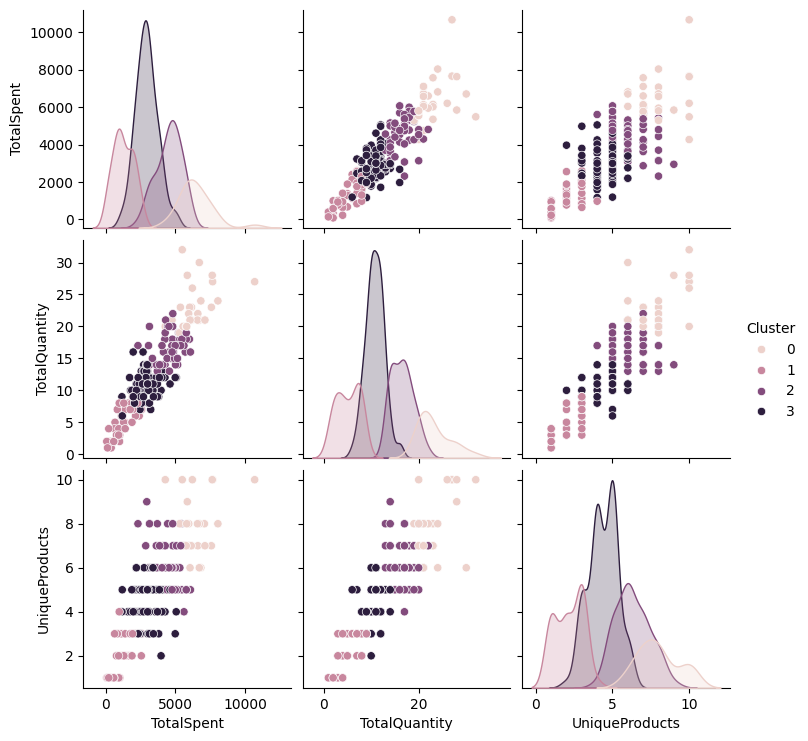

In [16]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_index}")

# Visualization
features['Cluster'] = labels
sns.pairplot(features, hue='Cluster')
plt.show()
